In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


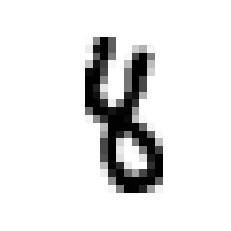

8


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[7000]
some_data_image = some_digit.reshape(28,28)

plt.imshow(some_data_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
print(y[7000])

In [8]:
# y is in the form of a string, converting it to an integer,
import numpy as np
y = y.astype(np.uint8)

# To create a train and a test set,

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# In this exercise, the first 60,000 instances (images) are used for training and the remaining 10,000 for testing.
# The data is already shuffled, which in this case, would ensure that all cross-validation being similar.

In [9]:
# Training a binary classifier,

# Trying instances containing 7 (Note: Binary would verify if an instance would or would not meet the condition)
y_train_7 = (y_train == 7)    # True for all 7s, False for all other instances
y_test_7 = (y_test == 7)

# Picking a classifier and training it,
from sklearn.linear_model import SGDClassifier    # Using the Stichastic Gradient Descent Classifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_7)

# Let's check the classifier by an instance,
sgd_clf.predict([some_digit])

array([False])

In [10]:
# Cross-validating the model with K-fold cross-validation technique,

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_7, cv = 3, scoring = "accuracy")

array([0.98105, 0.9735 , 0.95335])

In [11]:
# Let's try a different model than SGD
# Let's try BaseEstimator

from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

never_7_clf = Never7Classifier()
cross_val_score(never_7_clf, X_train, y_train_7, cv = 3, scoring = "accuracy")

array([0.89535, 0.8984 , 0.893  ])

In [ ]:
# A much efficient way to check the accuracy is to compute the 'confusion matrix'.
# The general idea is to count the number of instance the class A was classified as class B

from sklearn.model_selection import cross_val_score
y_train_pred = cross_val_score(sgd_clf, X_train, y_train, cv = 3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_pred)

# The output contains a 2x2 array: The first row considers non-7 images (negative class), where the first element is
# the number of correctly classified instances (true negatives) and the second element as wrongly classified (false
# negatives). The second row consists of the first element as wrongly classfied 7s (false positives) and the second
# element consists of correctly classfied 7s (true positives).

In [ ]:
# While the confusion matrix would give the information required, a measure called 'precision' of a classifier can be
# derived from the confusion matrix. This accurately describes the positive predictions.

# A mathematical formula is precision = TP / (TP + FP), where TP - true positive, FP - false positive

# For further accuracy, another measure called 'recall' or 'sensitivity' or 'true positive rate' (TPR) is used along with
# the precision measure.

# recall = TP + (TP + FN), where TP - True Positive, FN - False Negative

# Computing precision and recall,
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_7, y_train_pred)
recall_score(y_train_7, y_train_pred)

In [1]:
# It is often convenient to combine precision and recall into a single matrix called f1 score. The f1 score is the harmonic
# mean of precision and recall.
# Whilst the regular mean treats all values equally, a harmonic mean gives much more weight to low values.
# As a result, the classifier f1 will only get a hogh score if both precision and recall are high.

# The mathematical formula for f1 is:
# f1 = 2 / ( 1/precision + 1/recall) == TP/ (TP + ((FN + FP)/2))

# f1 is computed as,
from sklearn.metrics import f1_score
f1_score(y_train_7, y_train_pred)

NameError: name 'y_train_7' is not defined

In [ ]:
# With the type of the problem, it may be beneficial to increase or reduce precision or
# recall